In [7]:
import fireducks.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fchali=pd.read_csv("/workspaces/Arecanut-quality-classification/img-to-df/datasets-from-df.py/1stchali.csv")
gotu=pd.read_csv("/workspaces/Arecanut-quality-classification/img-to-df/datasets-from-df.py/gotu.csv")
kole=pd.read_csv("/workspaces/Arecanut-quality-classification/img-to-df/datasets-from-df.py/kole.csv")

In [3]:
print(fchali.info())
print(gotu.info())
print(kole.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 69.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 61.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 66.0+ MB
None


In [4]:
print(fchali.isnull().sum().any())
print(gotu.isnull().sum().any())
print(kole.isnull().sum().any())

False
False
False


In [5]:
fchali=fchali.drop("image_name",axis=1)
gotu=gotu.drop("image_name",axis=1)
kole=kole.drop("image_name",axis=1)

In [6]:
fchali['grade'] = 1
gotu['grade'] = 2
kole['grade'] = 3

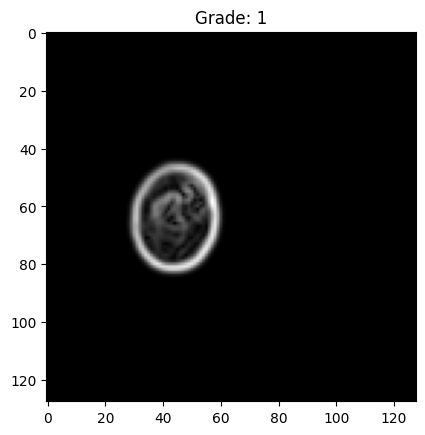

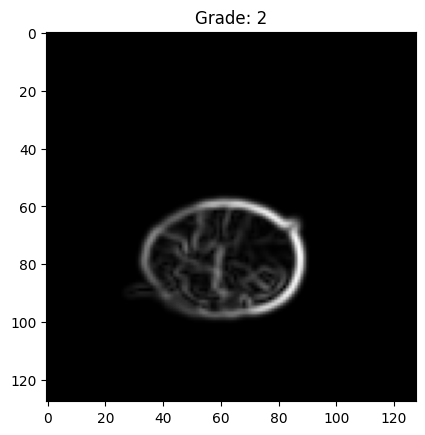

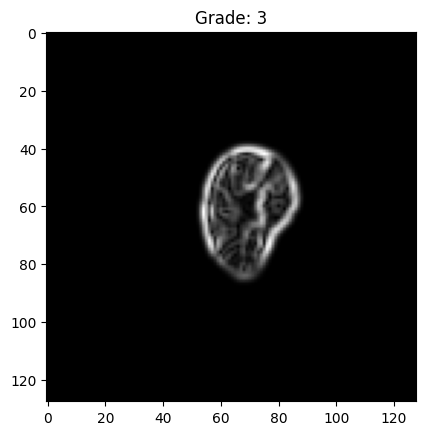

In [12]:
def display_image(df, index):
    image_data = df.iloc[index, :-2].values.reshape(128, 128)
    plt.imshow(image_data, cmap='gray')
    plt.title(f"Grade: {df.iloc[index, -1]}")
    plt.show()

display_image(fchali, 0)
display_image(gotu, 0)
display_image(kole, 0)